# Fine tuning a model

### Classification metrics
Measuring model performance with accuracy:
- fraction of correctly classified samples
- not always a useful metric

### class imbalance
For example
- classification for predicting fradulent bank transactions
  - 99% of transactions are legitimate; 1% are fraudulent
- could build a classifier that predicts NONE of the transactions are fraudulent
  - 99% accurate
  - BUT terrible at actually predicting fradulent transactions
  - fails at its orginal purpose
- class imbalance: uneven frequency of classes
- Need a different way to assess performance

### confusion matrix for assesing classification performance
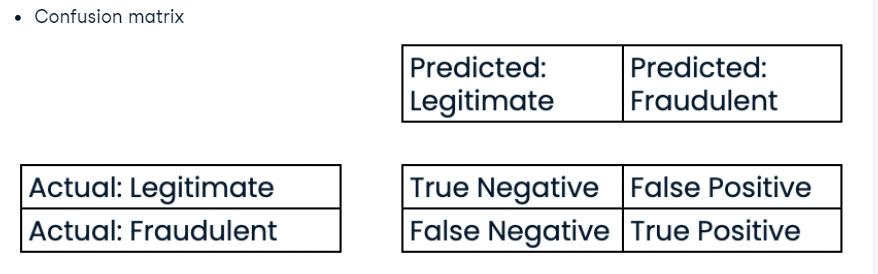
Importance of this : because of this -> accuracy
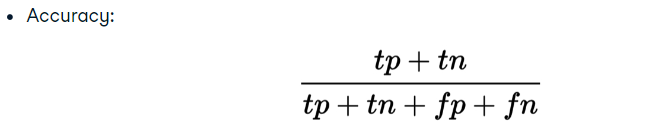
-> precision
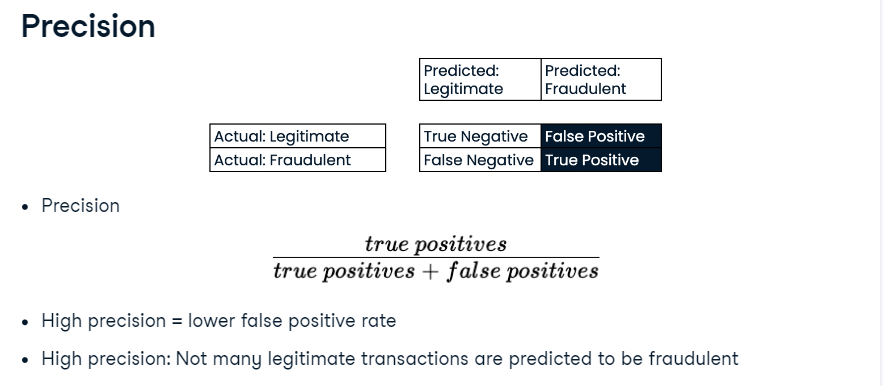
-> recall
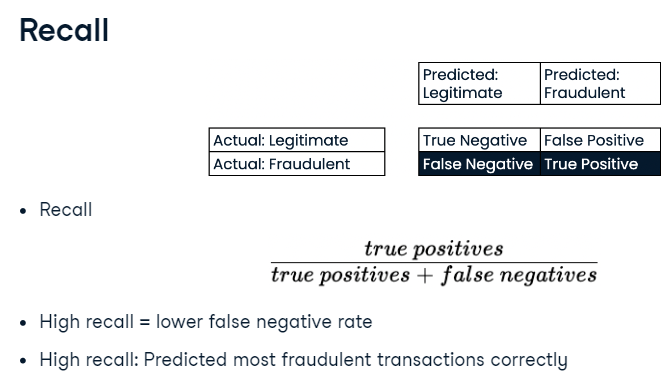
-> F1 score 
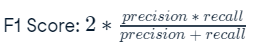

In [15]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
link = "https://assets.datacamp.com/production/repositories/5981/datasets/3d7b5bbdc7e91636cb1f9b62d9ca2a3959ce8aab/diabetes_clean.csv"
diabetes_df = pd.read_csv(urlretrieve(link, 'diabetes_clean.csv')[0])
print(diabetes_df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [16]:
x = diabetes_df.drop("glucose",axis=1).values
y=diabetes_df["glucose"].values
print(type(x),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(x_train, y_train)
y_pred = reg_all.predict(x_test)

In [18]:
# cofusion matrix in scikit learn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assuming x and y are already defined
knn = KNeighborsClassifier(n_neighbors=7)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [19]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
          44       0.00      0.00      0.00         0
          56       0.00      0.00      0.00         0
          57       0.00      0.00      0.00         0
          61       0.00      0.00      0.00         1
          62       0.00      0.00      0.00         1
          65       0.00      0.00      0.00         0
          67       0.00      0.00      0.00         0
          68       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         1
          72       0.00      0.00      0.00         0
          73       0.00      0.00      0.00         2
          74       0.00      0.00      0.00         3
          75       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         1
          77       0.00      0.00      0.00         2
          78       0.00      0.00      0.00         3
          79       0.00    

C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anoushka cha

In [20]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


### Logistic regression for binary classification
- logistic regression is used for classification problem, regardless for its name
- it outputs probabilities
- if the probability , p>0.5:
  - the data is labeled as 1 (likely to have diabetes)
- if the probability, p<0.5:
  - the data is labeled as 0 (less likely to have diabetes)

In [39]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Instantiate the model
logreg  = LogisticRegression(solver='liblinear', max_iter=200)

# Fit the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
logreg.fit(x_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(x_test)[:, 1]

print(y_pred_probs[:10])

[5.97872559e-11 3.83878274e-06 5.93711110e-03 1.08222642e-02
 5.29659994e-03 4.72669689e-11 3.06968134e-06 8.52620913e-04
 9.98588627e-09 1.74200474e-03]


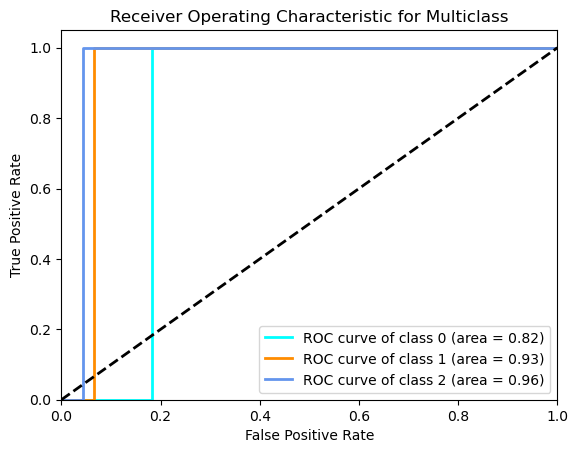

In [43]:
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Example data
# x, y = your features and labels

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create a pipeline with scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000))

# Fit the model
pipeline.fit(x_train, y_train)

# Predict probabilities
y_pred_probs = pipeline.predict_proba(x_test)

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc="lower right")
plt.show()



In [54]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import numpy as np
# Calculate and print the ROC AUC score for a multiclass classification problem
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
print(f'ROC AUC Score: {roc_auc}')

# Calculate the confusion matrix
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Calculate the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)



ROC AUC Score: 1.0
Confusion Matrix:
[[2 0 0]
 [0 2 0]
 [0 0 2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



### hyperparameter tuning
- Ridge/lasso regression: choosing alpha
- KNN: choosing n_neighbors
- heyperparameter: parameter we specify before fitting the model
  - like alpha and n_neighbors
    
SO, a fundamental step for building a successful model is choosing the correct hyperparameters.
 1. try lots of different hyperparameter values
  2. fit all of them separately
  3. see how well they perform
  4. choose the best performing values
this is called hyperparameter tuning. it is essential to use cross-validation to avoid overfitting to the test set. we can still split the data and perform cross-validation on the training set. we withhold the test set for final evaluation.

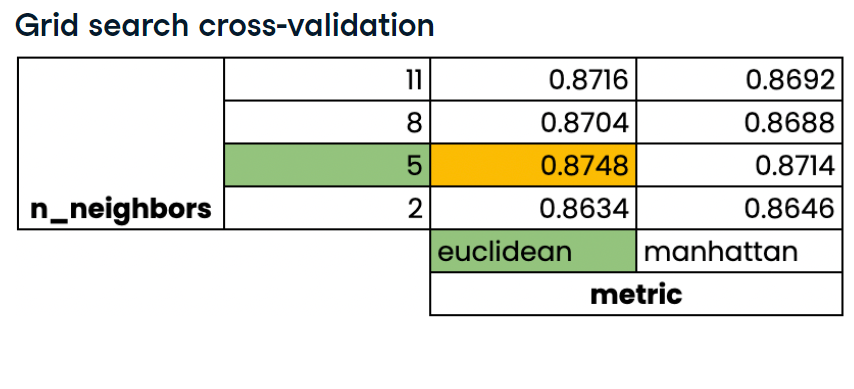

Limitations and an alternative approach:
- 3fold cross validation, 1 hyperparameter, 10 total values = 30fits
- 10fold cross validation, 3 hyperparameters, 30 total values = 900fits

  ### Randomized searchcv

In [70]:
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha':np.arange(0.0001,1,10),
              "solver":['sag','lsqr']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(x_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'solver': 'lsqr', 'alpha': 0.0001} 0.3351541735231673


C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
